In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈 
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# Flatten : 다차원의 이미지 데이터를 선형 회귀 은닉층으로 전달하기 전에
# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten
# Dropout : 이미지나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동한 학습이 진행될 수 있도록 한다.
from tensorflow.keras.layers import Dropout
# Embedding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM



# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence



# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 -> 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1

np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

### 데이터 읽어오기

In [2]:
# 엑셀파일로 부터 데이터 프레임을 생성한다.
# sheet_name : 숫자를 넣어주면 시트의 순서가 되고 문자열을 넣어주면 
# 시트의 이름이 된다. 기본값은 0으로 설정된다.
# mpg_df = pd.read_excel('./data/mpg.xlsx', sheet_name=0)
# mpg_df = pd.read_excel('./data/mpg.xlsx', sheet_name='mpg')
mpg_df = pd.read_excel('./data/mpg.xlsx')

mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 각 컬럼의 의미
- Unnamed:0 : 0부터 1씩 증가되는 값
- manufacturer : 자동차 제조회사
- model : 자동차 모델명
- displ : 자동차 배기량
- year : 생산년도
- cly : 실린더 개수
- trans : 변속기 종류
- drv : 구동방식
- cty : 도시 연비
- hwy : 고속도로 연비
- fl : 연료 종류
- class : 자동차종류

- 자동차 배기량에 따라 고속도로 연비가 다른지 확인한다.
- 자동차 제조회사별 평균 고속도로 연비를 출력하고 시각화한다.
- 생산년도에 따라 생상된 자동차의 종류 수를 출력하고 시각화한다.
- 변속기 종류에 따라 시내 연비가 다른지 확인한다.
- 연료 종류에 따라 고속도로 연비가 다른지 확인한다.
- 자동차 종류별로 몇 개씩 있는지 확인한다.

### 자동차 배기량에 따라 고속도로 연비가 다른지 확인한다.

In [3]:
# 자동차 배기량과 고속도로 연비를 가져온다.
a1 = mpg_df[['displ', 'hwy']]
a1

,displ,hwy
0,1.8,29
1,1.8,29
2,2.0,31
3,2.0,30
4,2.8,26
...,...,...
229,2.0,28
230,2.0,29
231,2.8,26
232,2.8,26


In [4]:
# 배기량을 기준으로 그룹을 묶고 고속도 연비 평균을 구한다.
a2 = a1.groupby('displ').mean()
a2.reset_index(inplace=True)
a2.columns = ['배기량', '고속도로 연비 평균']
a2.sort_values(by='배기량', inplace=True)
a2

,배기량,고속도로 연비 평균
0,1.6,31.600000
1,1.8,31.642857
2,1.9,43.000000
3,2.0,28.238095
4,2.2,27.333333
5,2.4,28.846154
6,2.5,26.800000
7,2.7,21.750000
8,2.8,24.900000
9,3.0,25.125000


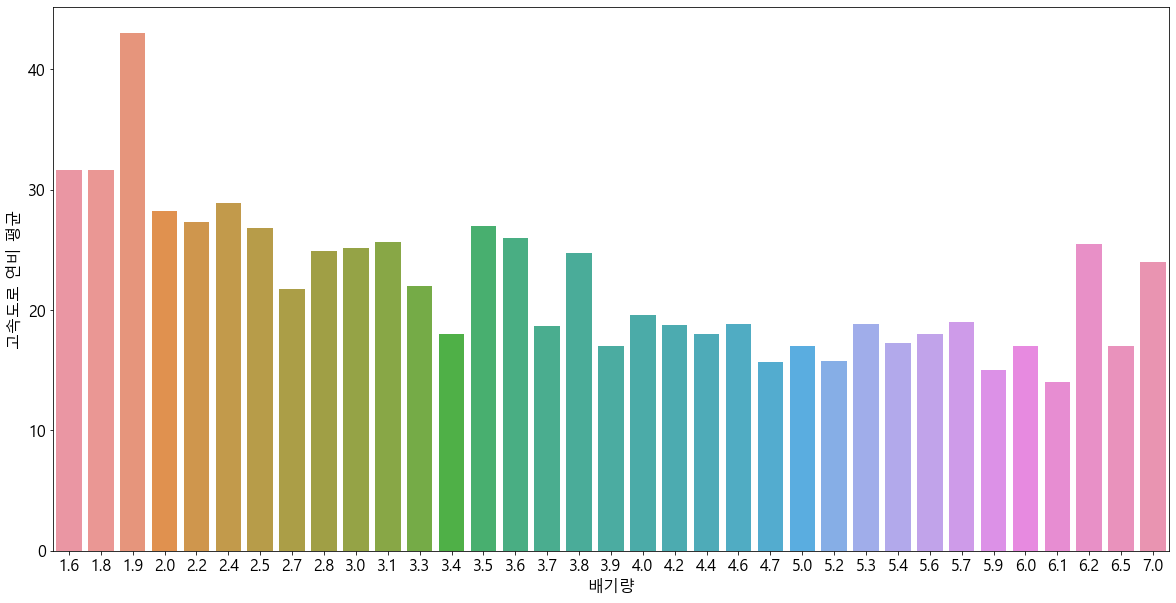

In [5]:
# 시각화
sns.barplot(data=a2, x='배기량', y='고속도로 연비 평균')
plt.show()

배기량이 낮을 수록 고속도로 연비 평균이 높아 진다.

### 자동차 제조회사별 평균 고속도로 연비를 출력하고 시각화한다.

In [7]:
# 자동차 제조 회사와 고속도로 연비를 가져온다.
a1 = mpg_df[['manufacturer', 'hwy']]
a1

,manufacturer,hwy
0,audi,29
1,audi,29
2,audi,31
3,audi,30
4,audi,26
...,...,...
229,volkswagen,28
230,volkswagen,29
231,volkswagen,26
232,volkswagen,26


In [8]:
# 자동차 회사를 기준으로 그룹을 묶고 고속도로 연비 평균을 구한다.
a2 = a1.groupby('manufacturer').mean()
a2.reset_index(inplace=True)
a2.columns = ['자동차 제조 회사', '고속도로 연비 평균']
a2.sort_values(by='고속도로 연비 평균', inplace=True, ascending=False)
a2

,자동차 제조 회사,고속도로 연비 평균
4,honda,32.555556
14,volkswagen,29.222222
5,hyundai,26.857143
0,audi,26.444444
11,pontiac,26.400000
12,subaru,25.571429
13,toyota,24.911765
10,nissan,24.615385
1,chevrolet,21.894737
3,ford,19.360000


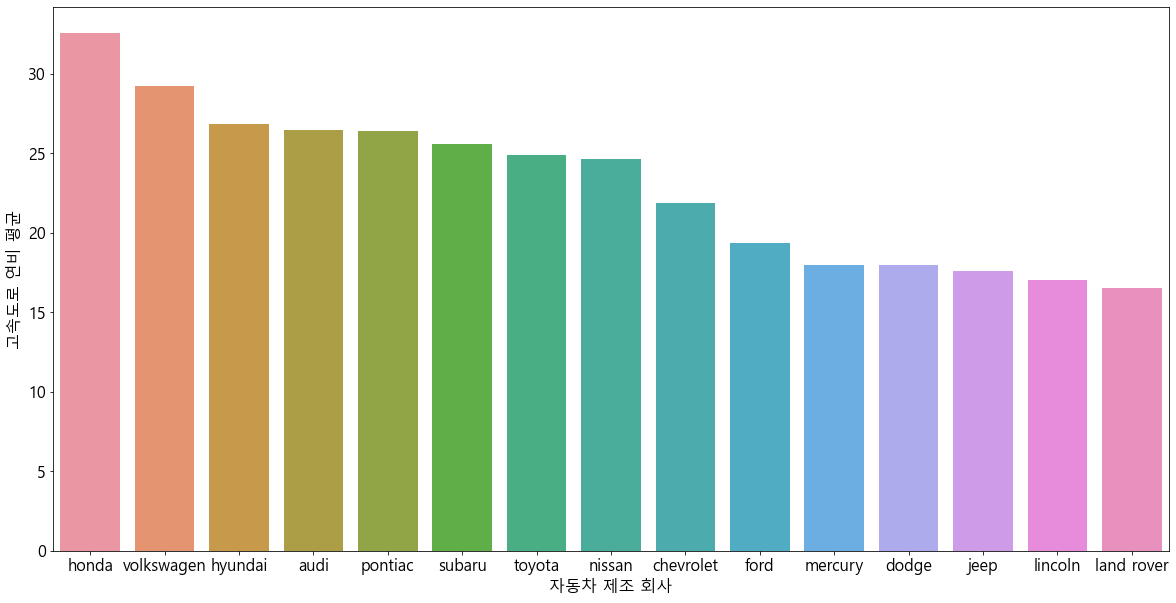

In [9]:
sns.barplot(data=a2, x='자동차 제조 회사', y='고속도로 연비 평균')
plt.show()

### 생산년도에 따라 생상된 자동차의 종류 수를 출력하고 시각화한다.

In [10]:
a1 = mpg_df[['year', 'model']]
a1

,year,model
0,1999,a4
1,1999,a4
2,2008,a4
3,2008,a4
4,1999,a4
...,...,...
229,2008,passat
230,2008,passat
231,1999,passat
232,1999,passat


In [11]:
# 제조년도를 기준으로 그룹을 묶고 개수를 계산한다.
a2 = a1.groupby('year').count()
a2.reset_index(inplace=True)
a2.columns = ['제조년도', '자동차수']
a2

,제조년도,자동차수
0,1999,117
1,2008,117


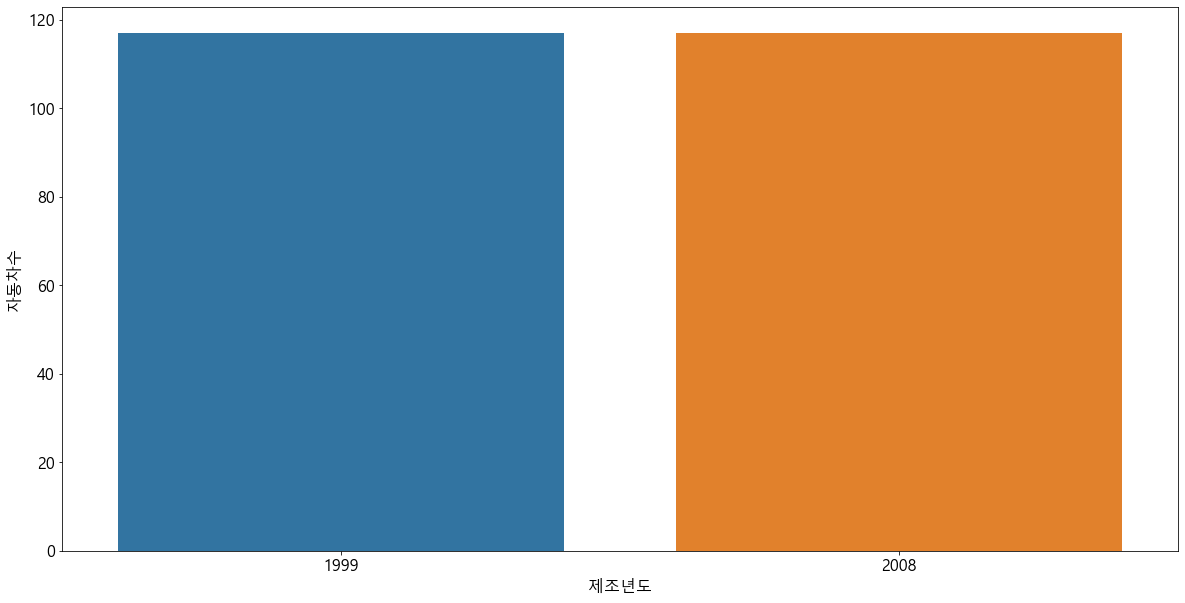

In [12]:
# 시각화 한다.
sns.barplot(data=a2, x='제조년도', y='자동차수')
plt.show()

### 변속기 종류에 따라 시내 연비가 다른지 확인한다.

In [13]:
# 변속기 종류와 시내 연비를 가져온다.
a1 = mpg_df[['trans', 'cty']]
a1

,trans,cty
0,auto(l5),18
1,manual(m5),21
2,manual(m6),20
3,auto(av),21
4,auto(l5),16
...,...,...
229,auto(s6),19
230,manual(m6),21
231,auto(l5),16
232,manual(m5),18


In [14]:
# 변속기를 기준으로 그룹을 묶고 도시 연비의 평균을 구한다.
a2 = a1.groupby('trans').mean()
a2.reset_index(inplace=True)
a2.columns = ['변속기 종류', '도시 연비 평균']
a2.sort_values(by='도시 연비 평균', ascending=False, inplace=True)
a2

,변속기 종류,도시 연비 평균
1,auto(l3),21.000000
0,auto(av),20.000000
8,manual(m5),19.258621
5,auto(s4),18.666667
7,auto(s6),17.375000
6,auto(s5),17.333333
9,manual(m6),16.894737
2,auto(l4),15.939759
3,auto(l5),14.717949
4,auto(l6),13.666667


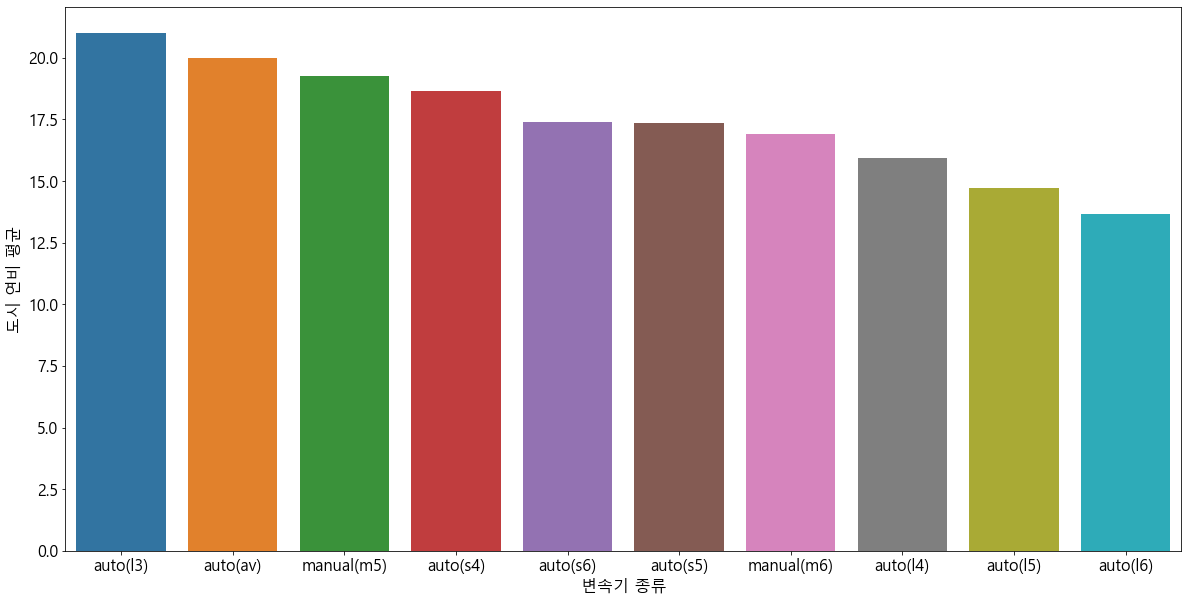

In [15]:
# 시각화 한다.
sns.barplot(data=a2, x='변속기 종류', y='도시 연비 평균')
plt.show()

### 연료 종류에 따라 고속도로 연비 평균이 다른지 확인한다.

In [16]:
# 연료 종류와 고속도로 연비 평균을 가져온다.
a1 = mpg_df[['fl', 'hwy']]
a1

,fl,hwy
0,p,29
1,p,29
2,p,31
3,p,30
4,p,26
...,...,...
229,p,28
230,p,29
231,p,26
232,p,26


In [17]:
# 연료 종류를 기준으로 그룹을 묶고 고속도로 연비 평균을 구한다.
a2 = a1.groupby('fl').mean()
a2.reset_index(inplace=True)
a2.columns = ['연료 종류', '고속도로 연비 평균']
a2.sort_values(by='고속도로 연비 평균', ascending=False, inplace=True)
a2

,연료 종류,고속도로 연비 평균
0,c,36.000000
1,d,33.600000
3,p,25.230769
4,r,22.994048
2,e,13.250000


In [18]:
m1 = {
    'c' : '가스',
    'd' : '디젤',
    'p' : '고급 휘발유',
    'r' : '일반 휘발유',
    'e' : '에탄올 혼합유'
}

a2['연료 종류'] = a2['연료 종류'].map(m1)
a2['연료 종류']

0         가스
1         디젤
3     고급 휘발유
4     일반 휘발유
2    에탄올 혼합유
Name: 연료 종류, dtype: object

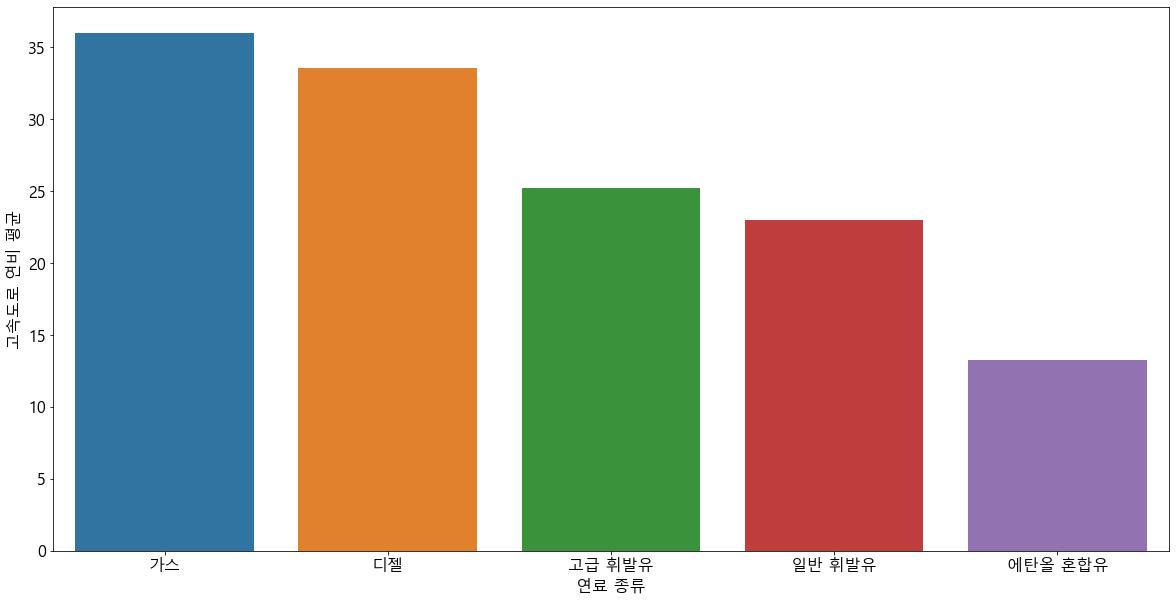

In [19]:
sns.barplot(data=a2, x='연료 종류', y='고속도로 연비 평균')
plt.show()

### 자동차 종류별로 몇 개씩 있는지 확인한다.

In [20]:
# 자동차 종류와 아무거나 가져온다.
a1 = mpg_df[['class', 'model']]
a1

,class,model
0,compact,a4
1,compact,a4
2,compact,a4
3,compact,a4
4,compact,a4
...,...,...
229,midsize,passat
230,midsize,passat
231,midsize,passat
232,midsize,passat


In [21]:
# 자동차 종류를 기준으로 그룹을 묶고 종류 수를 계산한다.
a2 = a1.groupby('class').count()
a2.reset_index(inplace=True)
a2.columns = ['자동차 종류', '자동차 종류 수']
a2.sort_values(by='자동차 종류 수', ascending=False, inplace=True)
a2

,자동차 종류,자동차 종류 수
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


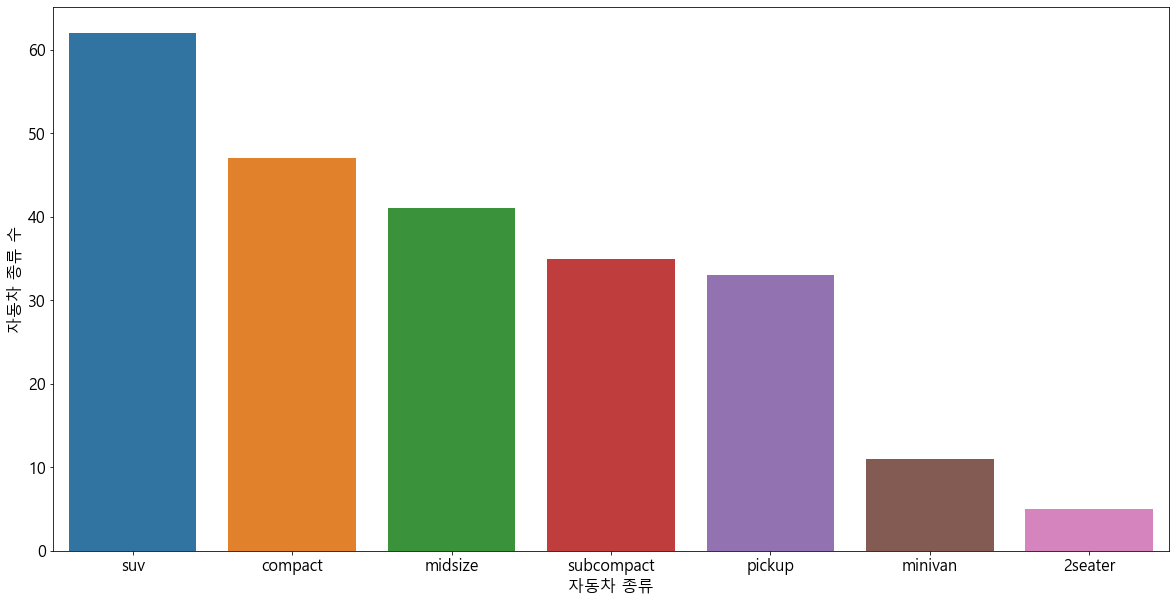

In [22]:
# 시각화한다.
sns.barplot(data=a2, x='자동차 종류', y='자동차 종류 수')
plt.show()